# SOM Visualization

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_all(x, k):
    plt.clf()
    x_data = x.T[0]
    y_data = x.T[1]

    kx_data = k.reshape(width * height, 2).T[0]
    ky_data = k.reshape(width * height, 2).T[1]

    plt.plot(x_data, y_data, 'r.')
    plt.plot(kx_data, ky_data, 'g+')

    ks = k.reshape(width * height, 2)
    for i in range(height):
        l = ks[i * width:(i + 1) * width]
        plt.plot(l.T[0], l.T[1], linestyle='-', color='g', linewidth=0.5)

    for i in range(height):
        lx = [ks[j][0] for j in range(width * height) if (j + i) % width == 0]
        ly = [ks[j][1] for j in range(width * height) if (j + i) % width == 0]
        plt.plot(lx, ly, linestyle='-', color='g', linewidth=0.5)

    plt.draw()

## Original Data

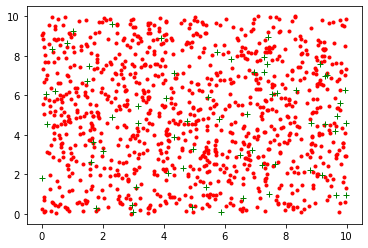

In [4]:
eta = 0.1
width, height = 8, 8

k = np.asarray([[random.random() * 10, random.random() * 10] for i in range(width) for j in range(height)])
k = k.reshape(width, height, 2)

x = np.asarray([[random.random() * 10, random.random() * 10] for i in range(1000)])

# x = x1
x_data = x.T[0]
y_data = x.T[1]

kx_data = k.reshape(width * height, 2).T[0]
ky_data = k.reshape(width * height, 2).T[1]

plt.plot(x_data, y_data, 'r.')
plt.plot(kx_data, ky_data, 'g+')
plt.ion()
plt.show()

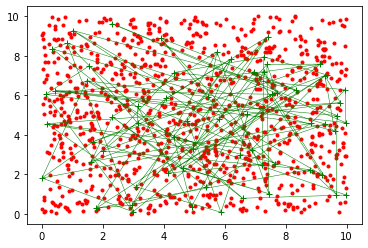

In [5]:
show_all(x, k)

## Adjust Weight
$W \rightarrow W+\eta X$

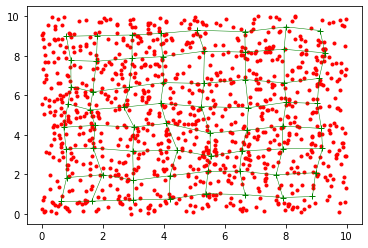

In [7]:
for i in range(100_000):

    # random pick
    x_id = (int)(random.random() * 1000)
    d = np.asarray([
        (k[i, j][0] - x[x_id][0])**2 + (k[i, j][1] - x[x_id][1])**2 
        for i in range(width) for j in range(height)
    ])

    # update winner
    winner = np.argmin(d)
    w = winner // width, winner % width
    k[w[0], w[1]] = k[w[0], w[1]] + eta * (x[x_id] - k[w[0], w[1]])

    # update neighbor
    eta_n = eta * 0.3
    if w[0] - 1 >= 0:
        k[w[0] - 1, w[1]] = k[w[0] - 1, w[1]] + eta_n * (x[x_id] - k[w[0] - 1, w[1]])
    if w[0] + 1 < width:
        k[w[0] + 1, w[1]] = k[w[0] + 1, w[1]] + eta_n * (x[x_id] - k[w[0] + 1, w[1]])
    if w[1] - 1 >= 0:
        k[w[0], w[1] - 1] = k[w[0], w[1] - 1] + eta_n * (x[x_id] - k[w[0], w[1] - 1])
    if w[1] + 1 < height:
        k[w[0], w[1] + 1] = k[w[0], w[1] + 1] + eta_n * (x[x_id] - k[w[0], w[1] + 1])
    
    # display network
    if i % 1000 == 0:
        show_all(x, k)